### Stock Price Prediction System For The BhartiAirtel share by Training the Dataset From 2002-2021

In this I have created a Machine Learning Model which is useful and helpful in Prediction of the Closing Price of a Stock for the 
BhartiAirtel by Training the Data set I have Trained my model to Predict the Closing Price of the shares for future

Step1:- Importing the all the neccessary Libraries That will be Used in this Project

In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print("All Libraries are Imported")

All Libraries are Imported


<p>Importing the Dataset of the BhartiAirtel

In [2]:
df=pd.read_csv("BHARTIARTL.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2002-02-18,BHARTI,EQ,0.00,51.90,51.90,43.50,44.70,44.35,46.00,10381190,4.775431e+13,NaN,6503775.0,0.6265
1,2002-02-19,BHARTI,EQ,44.35,45.15,45.15,41.30,41.35,41.70,42.58,3552660,1.512609e+13,NaN,1741184.0,0.4901
2,2002-02-20,BHARTI,EQ,41.70,40.60,42.80,40.25,41.20,41.25,41.56,2512964,1.044348e+13,NaN,NaN,NaN
3,2002-02-21,BHARTI,EQ,41.25,42.85,43.40,42.15,42.20,42.40,42.76,1338196,5.722681e+12,NaN,485969.0,0.3632
4,2002-02-22,BHARTI,EQ,42.40,42.65,43.60,41.10,43.35,43.30,42.75,811327,3.468413e+12,NaN,399133.0,0.4920


Analysing the Dataset 
1. Stastical Analysis of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4774 entries, 0 to 4773
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4774 non-null   object 
 1   Symbol              4774 non-null   object 
 2   Series              4774 non-null   object 
 3   Prev Close          4774 non-null   float64
 4   Open                4774 non-null   float64
 5   High                4774 non-null   float64
 6   Low                 4774 non-null   float64
 7   Last                4774 non-null   float64
 8   Close               4774 non-null   float64
 9   VWAP                4774 non-null   float64
 10  Volume              4774 non-null   int64  
 11  Turnover            4774 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4758 non-null   float64
 14  %Deliverble         4758 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 559.6

In [4]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4.774000e+03,4.774000e+03,2456.000000,4.758000e+03,4758.000000
mean,379.688333,380.478456,387.034761,372.705216,379.798502,379.800765,379.824874,5.341070e+06,2.245218e+14,85133.370114,2.653730e+06,0.521711
std,207.237329,207.774041,212.037403,202.270599,207.163319,207.176886,206.953021,7.976471e+06,4.014405e+14,75136.125261,4.016530e+06,0.148377
min,0.000000,21.100000,21.600000,20.650000,20.700000,20.750000,20.960000,2.824600e+04,7.373966e+10,1392.000000,1.830100e+04,0.071900
25%,301.325000,302.000000,306.825000,296.575000,301.162500,301.400000,301.390000,1.838864e+06,5.580891e+13,43331.000000,8.125398e+05,0.417850
50%,348.800000,349.000000,353.925000,343.500000,348.575000,348.800000,348.750000,3.474614e+06,1.268449e+14,62231.500000,1.793994e+06,0.530000
75%,423.850000,425.000000,431.312500,417.250000,423.275000,423.937500,424.297500,5.922892e+06,2.382761e+14,97361.750000,3.254393e+06,0.628475
max,1125.650000,1133.900000,1184.200000,1090.250000,1131.350000,1125.650000,1113.580000,1.948880e+08,1.090756e+16,946705.000000,1.229199e+08,0.999800


#### Finding the Null Values in The Dataset

In [6]:
df.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2318
Deliverable Volume      16
%Deliverble             16
dtype: int64

In [7]:
df.size

71610

<p> Removing the null values

In [8]:
df2=df.dropna()

In [10]:
df2.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2318,2011-06-01,BHARTIARTL,EQ,374.15,375.25,384.65,375.00,381.75,381.60,381.07,4153497,1.582781e+14,47549.0,2387047.0,0.5747
2319,2011-06-02,BHARTIARTL,EQ,381.60,379.00,385.90,378.50,381.05,381.15,382.61,2037011,7.793876e+13,29176.0,1064294.0,0.5225
2320,2011-06-03,BHARTIARTL,EQ,381.15,382.00,384.60,377.15,379.30,378.45,381.20,2443813,9.315705e+13,26544.0,1594229.0,0.6524
2321,2011-06-06,BHARTIARTL,EQ,378.45,380.35,382.60,375.50,380.05,380.00,380.05,2540466,9.655161e+13,24197.0,1733467.0,0.6823
2322,2011-06-07,BHARTIARTL,EQ,380.00,379.00,381.85,377.00,378.45,377.85,379.53,1980997,7.518469e+13,17995.0,1267789.0,0.6400


In [191]:
df2.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [12]:
df2.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2318,2011-06-01,BHARTIARTL,EQ,374.15,375.25,384.65,375.00,381.75,381.60,381.07,4153497,1.582781e+14,47549.0,2387047.0,0.5747
2319,2011-06-02,BHARTIARTL,EQ,381.60,379.00,385.90,378.50,381.05,381.15,382.61,2037011,7.793876e+13,29176.0,1064294.0,0.5225
2320,2011-06-03,BHARTIARTL,EQ,381.15,382.00,384.60,377.15,379.30,378.45,381.20,2443813,9.315705e+13,26544.0,1594229.0,0.6524
2321,2011-06-06,BHARTIARTL,EQ,378.45,380.35,382.60,375.50,380.05,380.00,380.05,2540466,9.655161e+13,24197.0,1733467.0,0.6823
2322,2011-06-07,BHARTIARTL,EQ,380.00,379.00,381.85,377.00,378.45,377.85,379.53,1980997,7.518469e+13,17995.0,1267789.0,0.6400


In [15]:
print(df2["High"].max())
print(df2.High.min())

623.0
243.85


In [17]:
print(df2.Turnover.max())
print(df2.Turnover.min())

1.0907564462725e+16
2189775000000.0


#### Finding All the Maximum and Minimum Values in the Dataset From Each Column 

In [18]:
print(df2.min())

Date                       2011-06-01
Symbol                     BHARTIARTL
Series                             EQ
Prev Close                      242.3
Open                            240.0
High                           243.85
Low                             215.8
Last                            241.1
Close                           242.3
VWAP                           241.61
Volume                          71097
Turnover              2189775000000.0
Trades                         1392.0
Deliverable Volume            18301.0
%Deliverble                    0.0719
dtype: object


In [19]:
print(df2.max())

Date                           2021-04-30
Symbol                         BHARTIARTL
Series                                 EQ
Prev Close                         608.85
Open                                614.9
High                                623.0
Low                                599.45
Last                                611.9
Close                              608.85
VWAP                               613.31
Volume                          194887984
Turnover              10907564462725000.0
Trades                           946705.0
Deliverable Volume            122919948.0
%Deliverble                        0.9263
dtype: object


In [21]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2002-02-18,BHARTI,EQ,0.00,51.90,51.90,43.50,44.70,44.35,46.00,10381190,4.775431e+13,NaN,6503775.0,0.6265
1,2002-02-19,BHARTI,EQ,44.35,45.15,45.15,41.30,41.35,41.70,42.58,3552660,1.512609e+13,NaN,1741184.0,0.4901
2,2002-02-20,BHARTI,EQ,41.70,40.60,42.80,40.25,41.20,41.25,41.56,2512964,1.044348e+13,NaN,NaN,NaN
3,2002-02-21,BHARTI,EQ,41.25,42.85,43.40,42.15,42.20,42.40,42.76,1338196,5.722681e+12,NaN,485969.0,0.3632
4,2002-02-22,BHARTI,EQ,42.40,42.65,43.60,41.10,43.35,43.30,42.75,811327,3.468413e+12,NaN,399133.0,0.4920


In [23]:
print(df2.Date.dtype)

object


Converting the Date Column From Object Data type to datetime data type beacuse we cannot train the model with object data type

In [28]:
# df2["Date"]=pd.to_datetime(df2["Date"])
# df2.sort_values("Date",inplace=True)
# df2.set_index("Date",inplace=True)

# this cell will run only at one time 

In [29]:
df2.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [30]:
df2.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2011-06-01,BHARTIARTL,EQ,374.15,375.25,384.65,375.00,381.75,381.60,381.07,4153497,1.582781e+14,47549.0,2387047.0,0.5747
2011-06-02,BHARTIARTL,EQ,381.60,379.00,385.90,378.50,381.05,381.15,382.61,2037011,7.793876e+13,29176.0,1064294.0,0.5225
2011-06-03,BHARTIARTL,EQ,381.15,382.00,384.60,377.15,379.30,378.45,381.20,2443813,9.315705e+13,26544.0,1594229.0,0.6524
2011-06-06,BHARTIARTL,EQ,378.45,380.35,382.60,375.50,380.05,380.00,380.05,2540466,9.655161e+13,24197.0,1733467.0,0.6823
2011-06-07,BHARTIARTL,EQ,380.00,379.00,381.85,377.00,378.45,377.85,379.53,1980997,7.518469e+13,17995.0,1267789.0,0.6400


2. Analysing The Dataset Through Visual Representation

#### Analysing the Close Price Column 

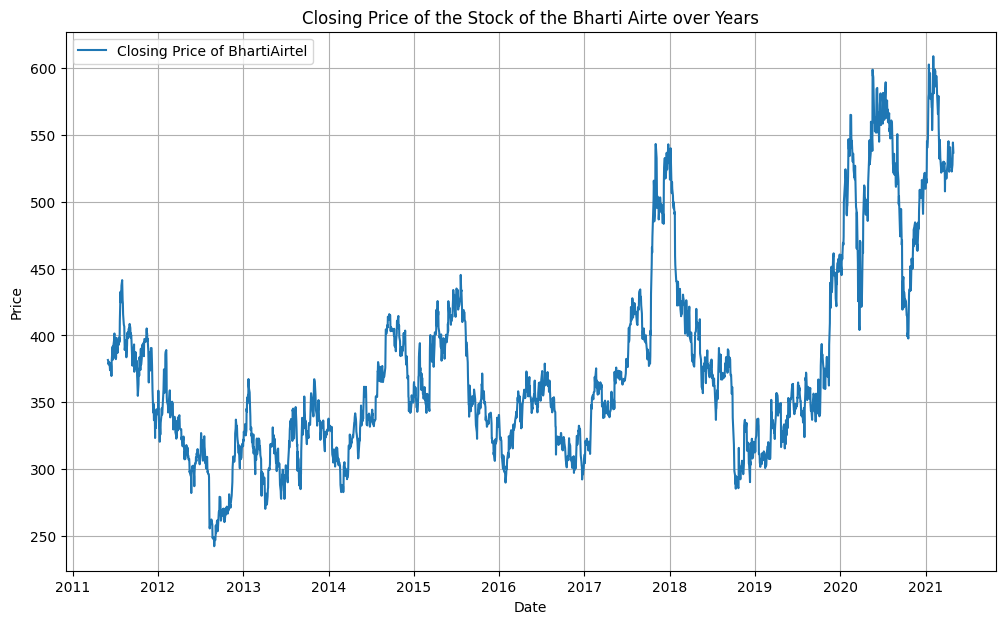

In [33]:
plt.figure(figsize=(12,7))
plt.plot(df2["Close"],label="Closing Price of BhartiAirtel")
plt.title("Closing Price of the Stock of the Bharti Airte over Years")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


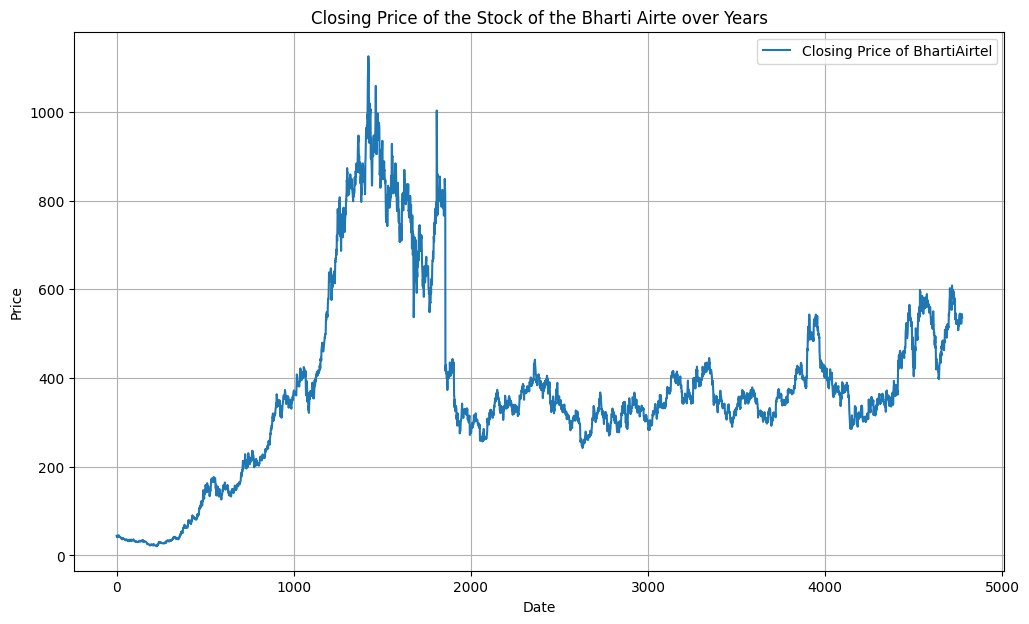

In [34]:
plt.figure(figsize=(12,7))
plt.plot(df["Close"],label="Closing Price of BhartiAirtel")
plt.title("Closing Price of the Stock of the Bharti Airte over Years")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

In [ ]:
df["Date"]=pd.to_datetime(df["Date"])

In [38]:
df.set_index("Date",inplace=True)

In [39]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2002-02-18,BHARTI,EQ,0.00,51.90,51.90,43.50,44.70,44.35,46.00,10381190,4.775431e+13,NaN,6503775.0,0.6265
2002-02-19,BHARTI,EQ,44.35,45.15,45.15,41.30,41.35,41.70,42.58,3552660,1.512609e+13,NaN,1741184.0,0.4901
2002-02-20,BHARTI,EQ,41.70,40.60,42.80,40.25,41.20,41.25,41.56,2512964,1.044348e+13,NaN,NaN,NaN
2002-02-21,BHARTI,EQ,41.25,42.85,43.40,42.15,42.20,42.40,42.76,1338196,5.722681e+12,NaN,485969.0,0.3632
2002-02-22,BHARTI,EQ,42.40,42.65,43.60,41.10,43.35,43.30,42.75,811327,3.468413e+12,NaN,399133.0,0.4920


<p> Using a Different Approach To understand the dataset


In [42]:
df.dropna(inplace=True)

[]

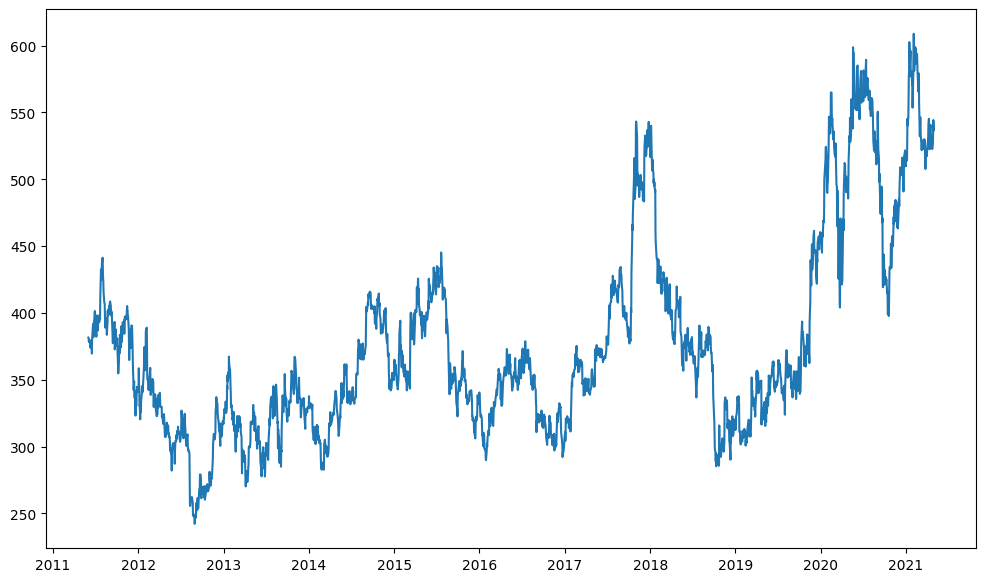

In [43]:
plt.figure(figsize=(12,7))
plt.plot(df["Close"],label="Closing Price of Bharti Airtel")
plt.plot()

In [44]:
df2.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2011-06-01,BHARTIARTL,EQ,374.15,375.25,384.65,375.00,381.75,381.60,381.07,4153497,1.582781e+14,47549.0,2387047.0,0.5747
2011-06-02,BHARTIARTL,EQ,381.60,379.00,385.90,378.50,381.05,381.15,382.61,2037011,7.793876e+13,29176.0,1064294.0,0.5225
2011-06-03,BHARTIARTL,EQ,381.15,382.00,384.60,377.15,379.30,378.45,381.20,2443813,9.315705e+13,26544.0,1594229.0,0.6524
2011-06-06,BHARTIARTL,EQ,378.45,380.35,382.60,375.50,380.05,380.00,380.05,2540466,9.655161e+13,24197.0,1733467.0,0.6823
2011-06-07,BHARTIARTL,EQ,380.00,379.00,381.85,377.00,378.45,377.85,379.53,1980997,7.518469e+13,17995.0,1267789.0,0.6400


Creating Heatmap to analyse the Dataset in more easy way

<p> Befor Creating the Heatmap Visuals we need to convert all the string data types into int or numeric 
or we can drop them . Because Heatmap is only created for the numeric column it cannot be created for the strig

In [46]:
df3=df2.drop(["Symbol","Series","Turnover","Trades"],axis="columns")

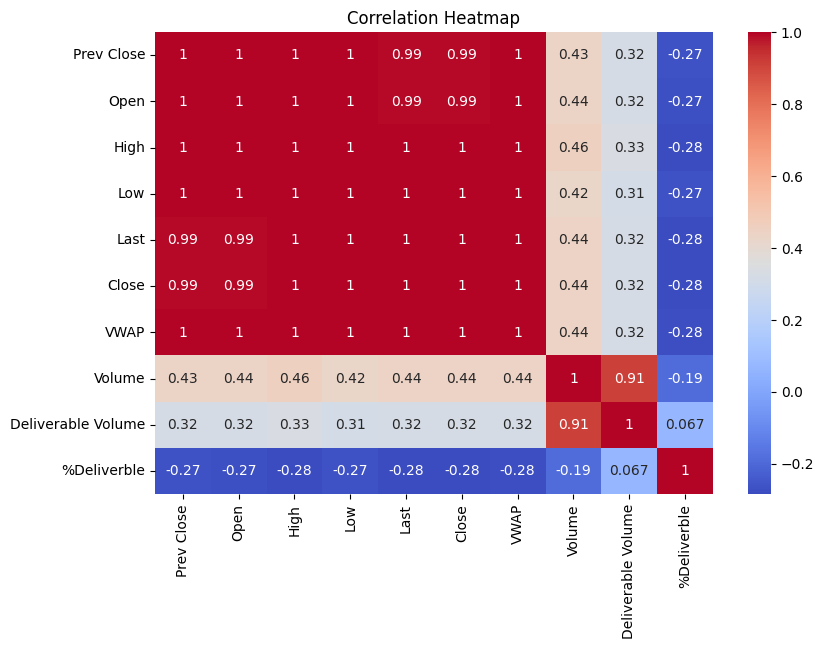

In [47]:
plt.figure(figsize=(9,6))
sns.heatmap(df3.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

The Column We Required to Predict the Price of the Stock are as follows:-

1. open
2. High 
3. Low 
4. Close
5. Volumn
6. Close_1
7. High_Low_Spread
8. Return
9. SMA_5
10. SMA_10

Detecting the Outliers in the dataset by uisng the Box Plot

In [48]:
df3.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Deliverable Volume,%Deliverble
Date,,,,,,,,,,
2011-06-01,374.15,375.25,384.65,375.00,381.75,381.60,381.07,4153497,2387047.0,0.5747
2011-06-02,381.60,379.00,385.90,378.50,381.05,381.15,382.61,2037011,1064294.0,0.5225
2011-06-03,381.15,382.00,384.60,377.15,379.30,378.45,381.20,2443813,1594229.0,0.6524
2011-06-06,378.45,380.35,382.60,375.50,380.05,380.00,380.05,2540466,1733467.0,0.6823
2011-06-07,380.00,379.00,381.85,377.00,378.45,377.85,379.53,1980997,1267789.0,0.6400


In [50]:
df4=df3.drop(["Prev Close","VWAP","Deliverable Volume"],axis="columns")

In [51]:
df4.head()

,Open,High,Low,Last,Close,Volume,%Deliverble
Date,,,,,,,
2011-06-01,375.25,384.65,375.00,381.75,381.60,4153497,0.5747
2011-06-02,379.00,385.90,378.50,381.05,381.15,2037011,0.5225
2011-06-03,382.00,384.60,377.15,379.30,378.45,2443813,0.6524
2011-06-06,380.35,382.60,375.50,380.05,380.00,2540466,0.6823
2011-06-07,379.00,381.85,377.00,378.45,377.85,1980997,0.6400


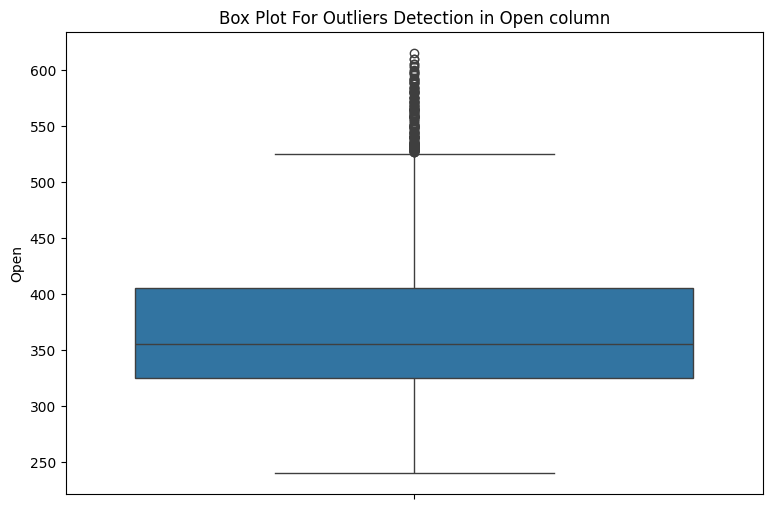

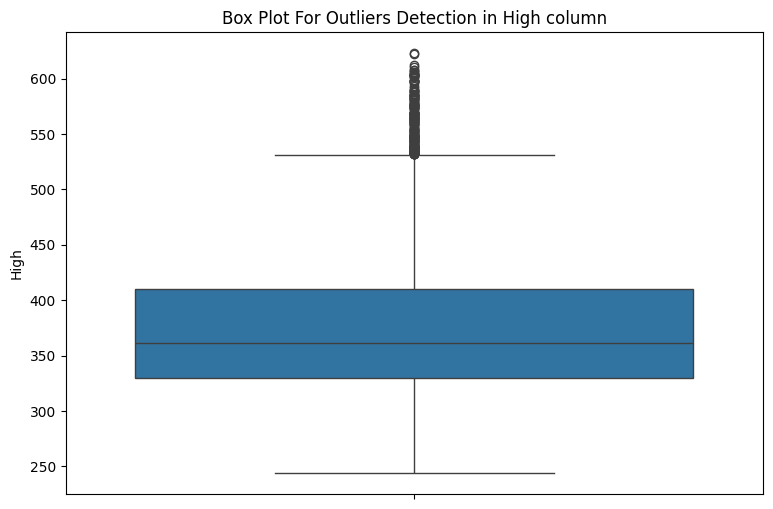

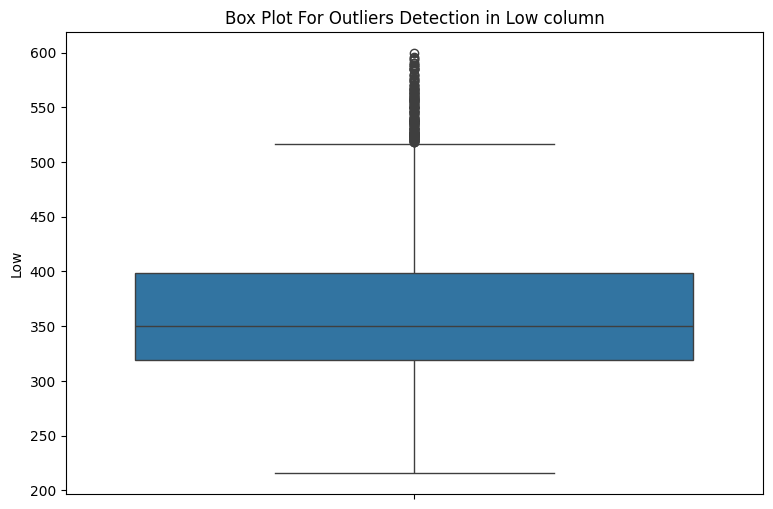

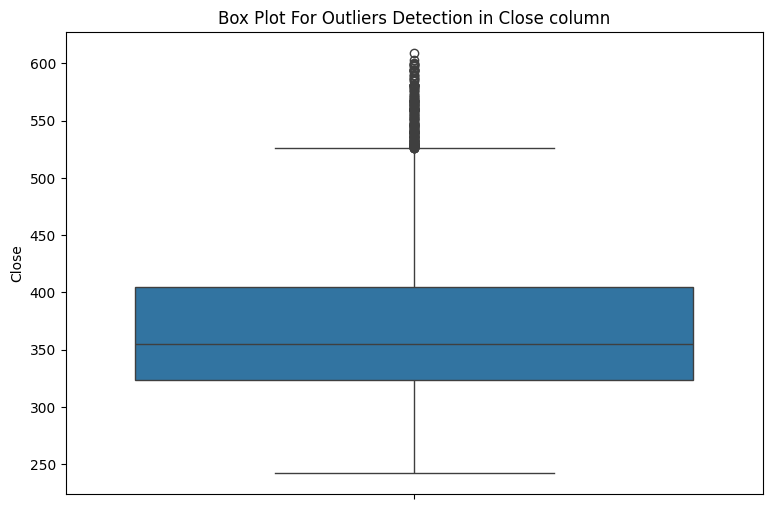

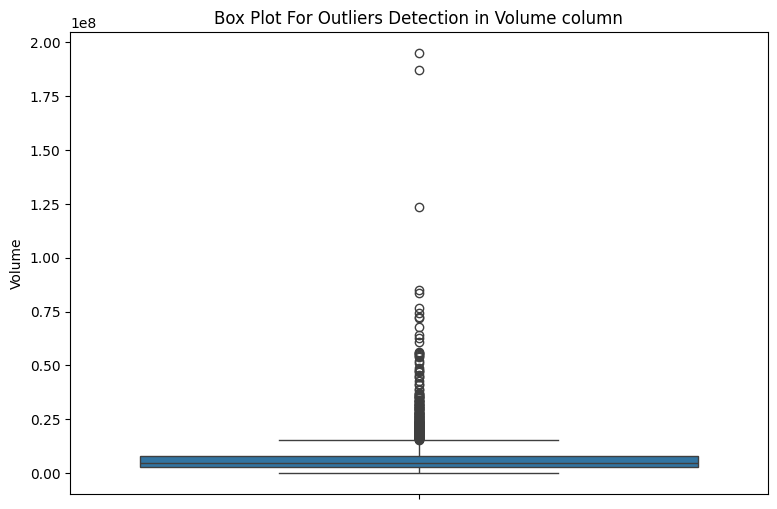

In [55]:
Box_columns=["Open","High","Low","Close","Volume"]
for i in Box_columns:
    plt.figure(figsize=(9,6))
    sns.boxplot(df4[i])
    plt.title("Box Plot For Outliers Detection in {} column".format(i))
    plt.show()

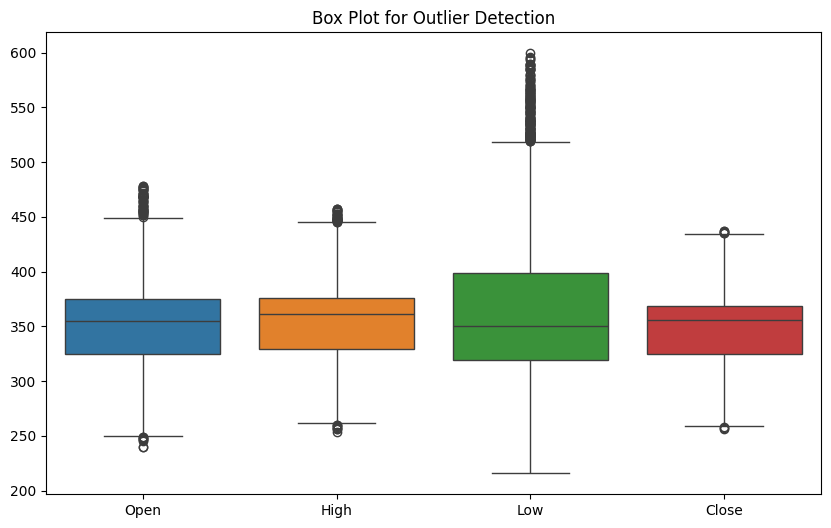

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df4[['Open', 'High', 'Low', 'Close']])
plt.title('Box Plot for Outlier Detection')
plt.show()

### From The Above visuals We can Clearly see that there are outliers in the dataset. so weed to fix them before Training our model because it can create the misconseption for our model in training 

In [199]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return data[(data[column] < lower_limit) | (data[column] > upper_limit)]


In [200]:
outliers = detect_outliers_iqr(df4, 'Close')
print(f"Total Outliers in Close Price: {len(outliers)}")


Total Outliers in Close Price: 8


In [201]:
def replace_outliers_with_median(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    median = data[column].median()
    
    data[column] = data[column].apply(lambda x: median if x < lower_limit or x > upper_limit else x)
    return data


In [202]:
df4.head()

,Open,High,Low,Last,Close,Volume,%Deliverble,Close_1,High_Low_Spread,Return,SMA_5,SMA_10
Date,,,,,,,,,,,,
2011-06-14,377.95,380.50,377.00,377.85,379.30,2879443.0,0.8234,377.60,3.50,0.004502,377.03,378.420
2011-06-15,377.95,379.40,375.10,377.55,376.75,2319378.0,0.7684,379.30,4.30,-0.006723,376.83,377.935
2011-06-16,375.00,379.80,367.65,371.70,369.65,5402846.0,0.8212,376.75,12.15,-0.018845,375.45,376.785
2011-06-17,369.20,381.95,369.20,379.20,380.55,4624129.0,0.6722,369.65,12.75,0.029487,376.77,376.995
2011-06-20,380.00,391.95,375.55,389.70,389.85,7974447.0,0.6314,380.55,16.40,0.024438,379.22,377.980


In [ ]:
df4 = replace_outliers_with_median(df4, 'Close')


In [89]:
df4=replace_outliers_with_median(df4,"Open")

In [93]:
df4=replace_outliers_with_median(df4,"High")

In [91]:
df4=replace_outliers_with_median(df4,"Volume")

In [94]:
outliers = detect_outliers_iqr(df4, 'Close')
print(f"Total Outliers in Close Price: {len(outliers)}")

Total Outliers in Close Price: 5


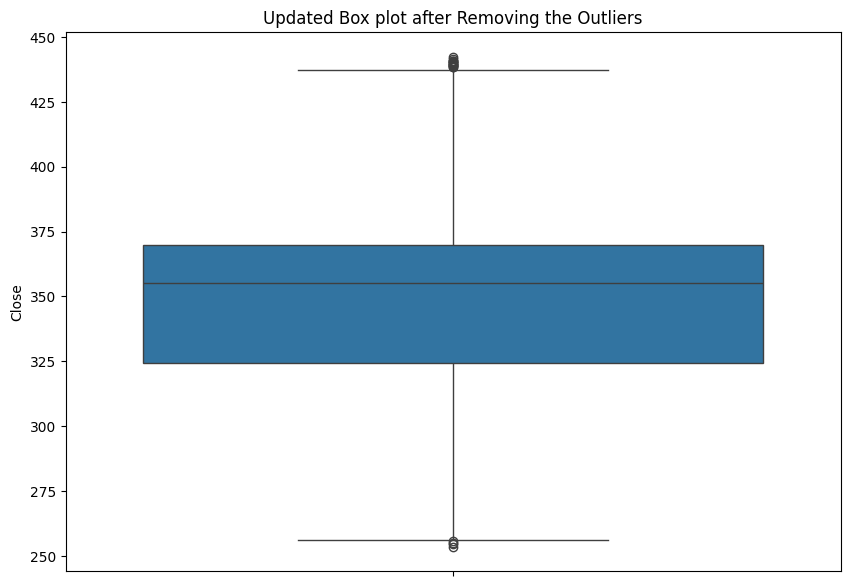

In [74]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df4["Close"])
plt.title("Updated Box plot after Removing the Outliers")
plt.show()


In [203]:
df5=df3.copy()

In [99]:
df5.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Deliverable Volume,%Deliverble
Date,,,,,,,,,,
2011-06-01,374.15,375.25,384.65,375.00,381.75,381.60,381.07,4153497,2387047.0,0.5747
2011-06-02,381.60,379.00,385.90,378.50,381.05,381.15,382.61,2037011,1064294.0,0.5225
2011-06-03,381.15,382.00,384.60,377.15,379.30,378.45,381.20,2443813,1594229.0,0.6524
2011-06-06,378.45,380.35,382.60,375.50,380.05,380.00,380.05,2540466,1733467.0,0.6823
2011-06-07,380.00,379.00,381.85,377.00,378.45,377.85,379.53,1980997,1267789.0,0.6400


In [222]:
df5.drop(["Prev Close","Last","VWAP","Deliverable Volume","%Deliverble"],axis="columns",inplace=True)

In [206]:
outliers = detect_outliers_iqr(df5, 'Close')
print(f"Total Outliers in Close Price: {len(outliers)}")


Total Outliers in Close Price: 176


In [207]:
def replace_outliers_with_median(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    median = data[column].median()
    
    data[column] = data[column].apply(lambda x: median if x < lower_limit or x > upper_limit else x)
    return data

In [212]:
df5 = replace_outliers_with_median(df5, 'Close')


In [213]:
df5=replace_outliers_with_median(df5,"Open")

In [214]:
df5=replace_outliers_with_median(df5,"High")

In [215]:
df5=replace_outliers_with_median(df5,"Volume")

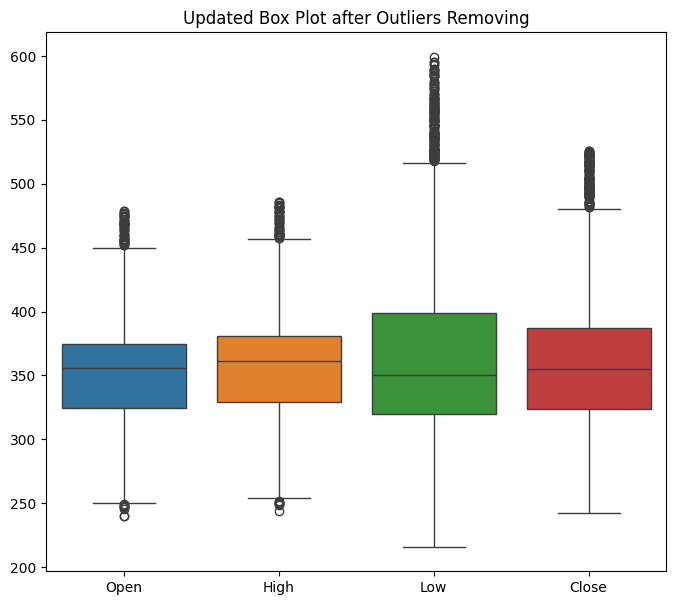

In [216]:
plt.figure(figsize=(8,7))
sns.boxplot(data=df5[["Open","High","Low","Close"]])
plt.title("Updated Box Plot after Outliers Removing")
plt.show()

In [217]:
outliers = detect_outliers_iqr(df5, 'Close')
print(f"Total Outliers in Close Price: {len(outliers)}")

Total Outliers in Close Price: 143


In [223]:
df5.head()

,Open,High,Low,Close,Volume
Date,,,,,
2011-06-01,375.25,384.65,375.00,381.60,4153497.0
2011-06-02,379.00,385.90,378.50,381.15,2037011.0
2011-06-03,382.00,384.60,377.15,378.45,2443813.0
2011-06-06,380.35,382.60,375.50,380.00,2540466.0
2011-06-07,379.00,381.85,377.00,377.85,1980997.0


In [218]:
df5.shape

(2456, 10)

In [224]:
df5

,Open,High,Low,Close,Volume
Date,,,,,
2011-06-01,375.25,384.650,375.00,381.600,4153497.00
2011-06-02,379.00,385.900,378.50,381.150,2037011.00
2011-06-03,382.00,384.600,377.15,378.450,2443813.00
2011-06-06,380.35,382.600,375.50,380.000,2540466.00
2011-06-07,379.00,381.850,377.00,377.850,1980997.00
...,...,...,...,...,...
2021-04-26,355.50,361.525,522.75,355.375,5819893.00
2021-04-27,355.50,361.550,526.25,355.375,9693047.00
2021-04-28,355.50,361.550,535.60,355.375,4725936.25


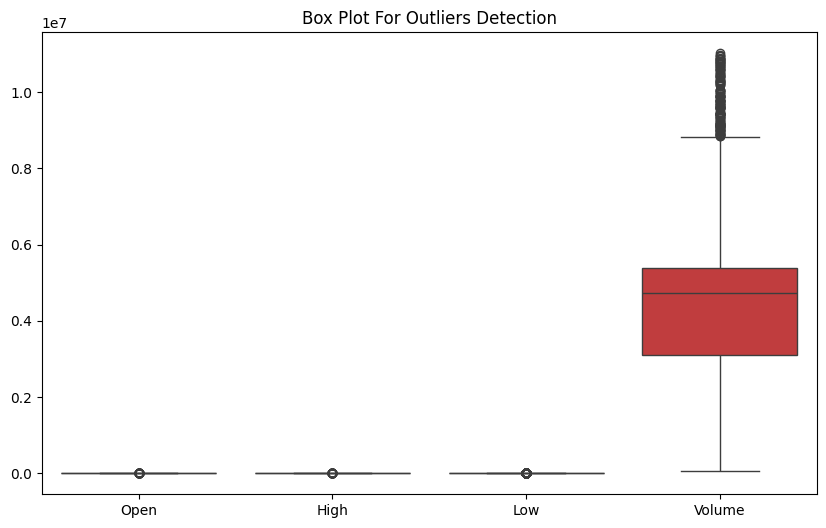

In [225]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df5[["Open","High","Low","Volume"]])
plt.title("Box Plot For Outliers Detection")
plt.show()

In [226]:
df5.head()

,Open,High,Low,Close,Volume
Date,,,,,
2011-06-01,375.25,384.65,375.00,381.60,4153497.0
2011-06-02,379.00,385.90,378.50,381.15,2037011.0
2011-06-03,382.00,384.60,377.15,378.45,2443813.0
2011-06-06,380.35,382.60,375.50,380.00,2540466.0
2011-06-07,379.00,381.85,377.00,377.85,1980997.0


In [227]:
df5["Close_1"]=df5['Close'].shift(1)

In [228]:
df5["High_Low_Spread"]=df5["High"]-df5["Low"]


In [229]:
df5["Return"]=(df5["Close"]-df5['Close_1'])/ df5['Close_1']

In [230]:
df5.head()

,Open,High,Low,Close,Volume,Close_1,High_Low_Spread,Return
Date,,,,,,,,
2011-06-01,375.25,384.65,375.00,381.60,4153497.0,NaN,9.65,NaN
2011-06-02,379.00,385.90,378.50,381.15,2037011.0,381.60,7.40,-0.001179
2011-06-03,382.00,384.60,377.15,378.45,2443813.0,381.15,7.45,-0.007084
2011-06-06,380.35,382.60,375.50,380.00,2540466.0,378.45,7.10,0.004096
2011-06-07,379.00,381.85,377.00,377.85,1980997.0,380.00,4.85,-0.005658


In [231]:
df5.isna().sum()

Open               0
High               0
Low                0
Close              0
Volume             0
Close_1            1
High_Low_Spread    0
Return             1
dtype: int64

In [152]:
df5.shape


(2456, 8)

In [232]:
df5['SMA_5'] = df5['Close'].rolling(window=5).mean()
df5['SMA_10'] = df5['Close'].rolling(window=10).mean()

In [233]:
df5.head()

,Open,High,Low,Close,Volume,Close_1,High_Low_Spread,Return,SMA_5,SMA_10
Date,,,,,,,,,,
2011-06-01,375.25,384.65,375.00,381.60,4153497.0,NaN,9.65,NaN,NaN,NaN
2011-06-02,379.00,385.90,378.50,381.15,2037011.0,381.60,7.40,-0.001179,NaN,NaN
2011-06-03,382.00,384.60,377.15,378.45,2443813.0,381.15,7.45,-0.007084,NaN,NaN
2011-06-06,380.35,382.60,375.50,380.00,2540466.0,378.45,7.10,0.004096,NaN,NaN
2011-06-07,379.00,381.85,377.00,377.85,1980997.0,380.00,4.85,-0.005658,379.81,NaN


In [234]:
df5.shape

(2456, 10)

In [235]:
df5.isna().sum()

Open               0
High               0
Low                0
Close              0
Volume             0
Close_1            1
High_Low_Spread    0
Return             1
SMA_5              4
SMA_10             9
dtype: int64

In [236]:
df5.dropna(inplace=True)


In [237]:
df5.isna().sum()

Open               0
High               0
Low                0
Close              0
Volume             0
Close_1            0
High_Low_Spread    0
Return             0
SMA_5              0
SMA_10             0
dtype: int64

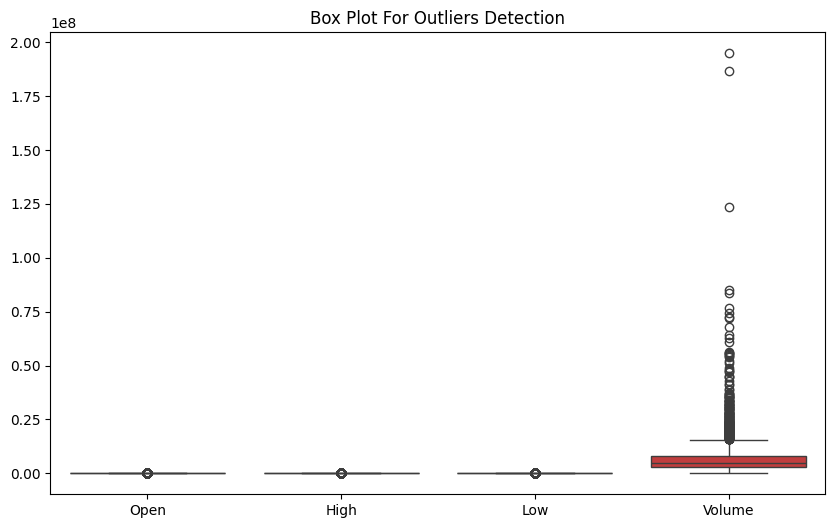

In [164]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df5[["Open","High","Low","Volume"]])
plt.title("Box Plot For Outliers Detection")
plt.show()

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [239]:
x=df5.drop(["Close"],axis="columns")


In [240]:
y=df5["Close"]

In [241]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=42)

In [242]:
model=RandomForestRegressor()

In [243]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [244]:
y_predict=model.predict(x_test)
print("The R2 score of the model is",r2_score(y_test,y_predict))

The R2 score of the model is 0.9325273649645517


In [245]:
new_data=[[]]

In [246]:
print(model.feature_names_in_)
print(len(model.feature_names_in_))

['Open' 'High' 'Low' 'Volume' 'Close_1' 'High_Low_Spread' 'Return' 'SMA_5'
 'SMA_10']
9


In [247]:
new_data = np.array([[1850.5, 1865.0, 1842.0, 1857.0, 250000, 1845.5, 23.0, 11.5, 1850.0]])

In [248]:
prediction=model.predict(new_data)
print("Prediction is:",prediction[0])

Prediction is: 403.3434999999999


c:\Users\codin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [249]:
new_data = np.array([[880.25, 885.90, 875.15, 882.10, 2000000, 879.50, 0.003, 880.10, 878.80]])

# Convert to DataFrame with correct feature names


In [251]:
prediction=model.predict(new_data)
print("Prediction is:",prediction[0])

Prediction is: 492.7165


c:\Users\codin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [189]:
import pickle

In [253]:
with open("model.pkl","wb") as file:
    pickle.dump(model,file)